# Plot PPDisk Simple Model 1 Part2 - CO Line
* CREDIT: RADMC-3D EXAMPLES
* MODELING TARGET: HD163296

## 00 - About *HD163296*

### Information:
* Right Acension (Ra): 17h53m20.6063742757s
* Declination (DEC): -21d56m57.379723676s 
* Star Class: Herbig Ae/Be star
* Spectral Type: A1Vep C
* Star Mass: 2.3 $M_{\odot}$
* Star Radius: 1.66 $R_{\odot}$
* Star Temperature: 9330 K
* Distance to us: 140. pc
* Inclination Angle: $42^{\circ}$
* Position Angle: $132^{\circ}$
* Disk Radius: 250. unit:AU
* Gap Position: 60., 100., 160. unit:AU
* Gap Width: 33., 26., 55. unit:AU

### Reference:
* *Rosenfeld et al.(2013)*
* *Isella et al. (2016)*
* *Gregorio-Monsalvo et al. (2013)*
* http://simbad.u-strasbg.fr/simbad/sim-id?Ident=HD+163296
* http://www.exoplanetkyoto.org/exohtml/HD_163296.html
* https://sites.uni.edu/morgans/astro/course/Notes/section2/spectraltemps.html

## 00 - Line Radmc3d Input (Control File for Molecule Lines)

In [7]:
nphot    = 1000000
# Add Line parameter to Dust radmc3d.inp control file
with open('radmc3d.inp','w+') as f:
    f.write('nphot = %d\n' % (nphot))
    f.write('scattering_mode_max = 0\n')   # Put this to 1 for isotropic scattering
    f.write('modified_random_walk = 1\n')  # Put this to 1 for random walk
    f.write('tgas_eq_tdust   = 0')

In [8]:
# Open Line Mode
from os import system
from os import path
if not path.isfile('lines.inp'):
    # Write the lines.inp control file
    with open('lines.inp','w') as f:
        f.write('1\n')
        f.write('1\n')
        f.write('co    leiden    0    0\n')

## 01 - Setup

In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
from radmc3dPy import *

In [10]:
def lam_to_freq(lam):
    '''
    lam: wavelength in um
    '''
    freq = 1e4 * natconst.cc / lam
    return freq

## 02 - Gas 2D Contour

In [11]:
data = analyze.readData(gdens=True, gtemp=True, ispec='co', binary=False)

Reading amr_grid.inp
Reading gas temperature
Reading gas density (numberdens_co.inp)


### (1) Gas Number Density Dist.

/home/jordanwu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


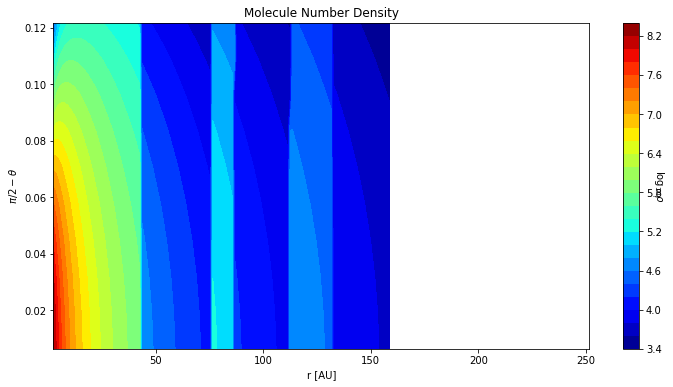

In [12]:
plt.figure(figsize=(12,6))
c = plt.contourf(data.grid.x/natconst.au, np.pi/2.-data.grid.y, np.log10(data.ndens_mol[:,:,0,0].T), 30, cmap='jet')
plt.xlabel('r [AU]')
plt.ylabel(r'$\pi/2-\theta$')
#plt.xscale('log')
cb = plt.colorbar(c)
cb.set_label(r'$\log_{10}{\rho}$', rotation=270.)
plt.title(r'Molecule Number Density')
plt.show()

### (2) Gas Temperature Dist. With Gas Temperature Contour

#### Option 1 - Gas Temperature from Formula

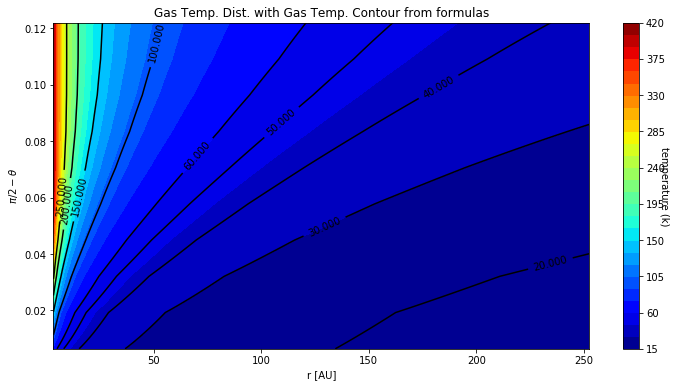

In [7]:
plt.figure(figsize=(12,6))
cs = plt.contourf(data.grid.x/natconst.au, np.pi/2.-data.grid.y, data.gastemp[:,:,0,0].T, 30, cmap='jet')
cb = plt.colorbar(cs)
cb.set_label(r'temperature (k)', rotation=270.)

temp_level = [20., 30., 40., 50., 60., 100., 150., 200., 250.]
c = plt.contour(data.grid.x/natconst.au, np.pi/2.-data.grid.y, data.gastemp[:,:,0,0].T, temp_level, colors='k', linestyles='solid', alpha=1.)
plt.clabel(c, inline=1, fontsize=10)

plt.title('Gas Temp. Dist. with Gas Temp. Contour from formulas')
plt.xlabel('r [AU]')
plt.ylabel(r'$\pi/2-\theta$')
#plt.xscale('log')
plt.show()

### (3) Gas Velocity Dist. from Keplerian Motion

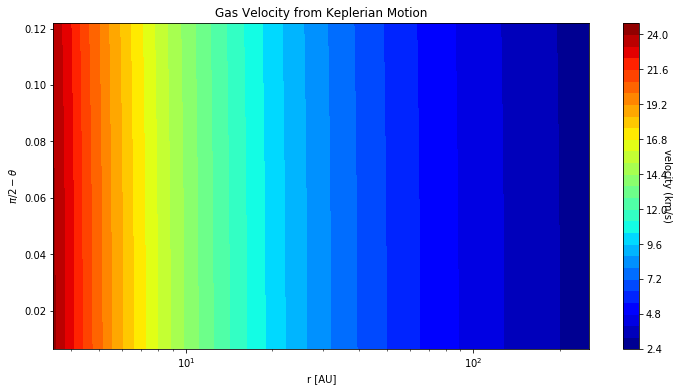

In [8]:
plt.figure(figsize=(12,6))
vpm = np.load('gas_velocity.npy')
cs = plt.contourf(data.grid.x/natconst.au, np.pi/2 - data.grid.y, vpm[:,:,0].T/1e5, 30, cmap='jet')
cb = plt.colorbar(cs)
cb.set_label(r'velocity (km/s)', rotation=270.)

plt.title('Gas Velocity from Keplerian Motion')
plt.xlabel('r [AU]')
plt.ylabel(r'$\pi/2-\theta$')
plt.xscale('log')
plt.show()

## 03 - Make Channel Image (WI Continuum Background)

#### 12CO (J 3-2) Line 
* Rest Freqency $f_0$: 461.04076820 GHz (650.7016748 $\mu m$)
* Microturbulence of velocity is added (each cell 0.5 km/s)

### (1) Find HD163296 Rest Freqency

Reading image.out


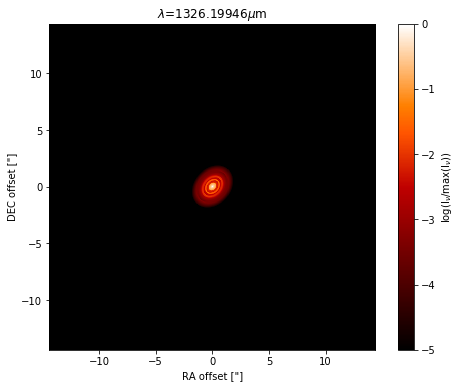

In [6]:
# Make and plot an example image
image.makeImage(npix=500., incl=42., posang=-132., sizeau=500., vkms=0.0, iline=3)
im = image.readImage()
plt.figure(figsize=(8,6))
image.plotImage(im, arcsec=True, dpc=122., log=True, maxlog=5., cmap=plt.cm.gist_heat)
plt.show()

### (2) Find HD123696 Boundary Channel

Reading image.out


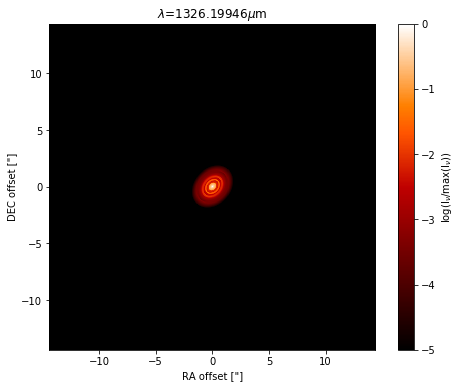

In [5]:
# Make and plot an example image
image.makeImage(npix=500., incl=42., posang=-132., sizeau=500., vkms=20.0, iline=3)
im = image.readImage()
plt.figure(figsize=(8,6))
image.plotImage(im, arcsec=True, dpc=122., log=True, maxlog=5., cmap=plt.cm.gist_heat)
plt.show()

### (3) Make HD163296 Multi-Image

In [11]:
# Make and plot an example image
# vkms_list = np.linspace(-5, 5, 11, endpoint=True)
# for i, vkms in enumerate(vkms_list):
#     image.makeImage(npix=500., incl=42., posang=-132., sizeau=500., vkms=vkms, iline=3)
#     im = image.readImage()
#     plb.figure(figsize=(8,6))
#     image.plotImage(im, arcsec=True, dpc=122., log=True, maxlog=5., cmap=plb.cm.gist_heat)
# plb.show()

## 04 -  Write Make Data Cube

### (1) Make CO 3-2 Cube

In [16]:
fitsname = input('Output Filename = ')
if len(fitsname) == 0:
    fitsname = 'HD163296_Cube.fits'

wav_central = 866.96337
wav_width = 0.06
image.makeImage(npix=500., incl=42., posang=-132., sizeau=500., lambdarange=[wav_central-wav_width, wav_central+wav_width], nlam=60) #vkms=0.0, iline=3)
im = image.readImage()
im.writeFits(fitsname, dpc=122., coord='17h53m20.6063742757s -21d56m57.379723676s')

Output Filename =  


Reading image.out


In [17]:
# Add Restfreqency to cube file
from astropy.io import fits
data = fits.getdata(fitsname)
header = fits.getheader(fitsname)
header['RESTFRQ'] = natconst.cc*1e-2/866.96337e-6 
fits.writeto(fitsname, data, header, overwrite=True)